In [57]:
from ib_insync import *
from  configuration.ibtrader_functions import *
from  configuration.ibtrader_settings import * 
from  configuration.ibtrader_stocks import * 
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import pandas_ta as ta


plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14)


In [58]:
# WEEKLY  
df = pd.read_csv(getFile("CTXS",SETTINGS_REALPATH_STOCK_DATA_DAY))

C:\Users\DAVIDNEVADO\git\py_ibtrader\data/DAY/CTXS_*.csv


In [61]:
pd.DataFrame().ta.indicators()

pandas.ta - Technical Analysis Indicators - v0.1.66b
Total Indicators: 107
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, decreasing, dema, donchian, dpo, efi, ema, entropy, eom, fisher, fwma, ha, hl2, hlc3, hma, ichimoku, increasing, kama, kc, kdj, kst, kurtosis, linear_decay, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, ppo, psar, psl, pvi, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, rvi, short_run, sinwma, skew, slope, sma, stdev, stoch, supertrend, swma, t3, tema, trend_return, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, wcp, willr, wma, zlma, zscore


In [103]:
dfsma = df.ta.sma(length=10, append=True)
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
efidf = df.ta.efi(length=2, append=True)



1258   -2.983756
Name: MACD_8_21_9, dtype: float64

In [82]:
dfsma

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1254    146.461
1255    144.144
1256    141.693
1257    141.218
1258    141.083
Name: SMA_10, Length: 1259, dtype: float64

,MACD_8_21_9,MACDH_8_21_9,MACDS_8_21_9
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1254,-3.408836,-2.378783,-1.030053
1255,-3.219728,-1.751740,-1.467988
1256,-3.020970,-1.242386,-1.778584
1257,-3.062334,-1.027000,-2.035334


In [76]:
efidf

0                NaN
1                NaN
2       20466.048750
3       11000.645769
4       10197.364875
            ...     
1254   -18303.548614
1255     8931.337129
1256     2977.112376
1257    -5639.262541
1258     -473.920847
Name: EFI_2, Length: 1259, dtype: float64

In [50]:
#if necessary convert to datetime
df.date = pd.to_datetime(df.date)

df = df[['date', 'open', 'high', 'low', 'close']]
df["date"] = df["date"].apply(mpl_dates.date2num)

D:\MachineLearning\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [51]:
df

,date,open,high,low,close
0,735820.0,60.445,60.695,59.955,60.620
1,735821.0,60.290,60.400,59.330,59.880
2,735822.0,59.635,61.125,59.055,60.855
3,735823.0,61.075,61.395,60.330,61.155
4,735824.0,61.250,62.145,60.975,61.755
...,...,...,...,...,...
1254,737640.0,143.120,143.440,139.300,139.850
1255,737641.0,138.850,142.750,137.800,142.640
1256,737642.0,142.750,142.780,140.150,142.640
1257,737643.0,142.290,142.980,140.150,140.790


In [52]:
s =  np.mean(df['high'] - df['low'])

In [53]:
def isFarFromLevel(l):
   return np.sum([abs(l-x) < s  for x in levels]) == 0

In [54]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['low'][i]
    if isFarFromLevel(l):
      levels.append((i,l))
  elif isResistance(df,i):
    l = df['high'][i]
    if isFarFromLevel(l):
      levels.append((i,l))

In [55]:
levels

[(2, 59.055),
 (7, 62.445),
 (11, 52.675),
 (30, 56.69),
 (63, 66.21),
 (112, 50.575),
 (205, 68.92),
 (303, 71.54),
 (346, 73.475),
 (368, 76.365),
 (386, 81.1),
 (394, 78.88),
 (409, 84.75),
 (575, 87.49),
 (621, 94.94),
 (645, 89.75),
 (652, 96.96),
 (699, 104.7),
 (711, 109.43),
 (744, 107.28),
 (746, 116.82),
 (801, 101.05),
 (1082, 114.73),
 (1121, 130.55),
 (1127, 120.69),
 (1130, 124.12),
 (1160, 141.01),
 (1176, 138.41),
 (1186, 148.7),
 (1204, 135.05),
 (1217, 143.59),
 (1246, 173.56)]

D:\MachineLearning\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


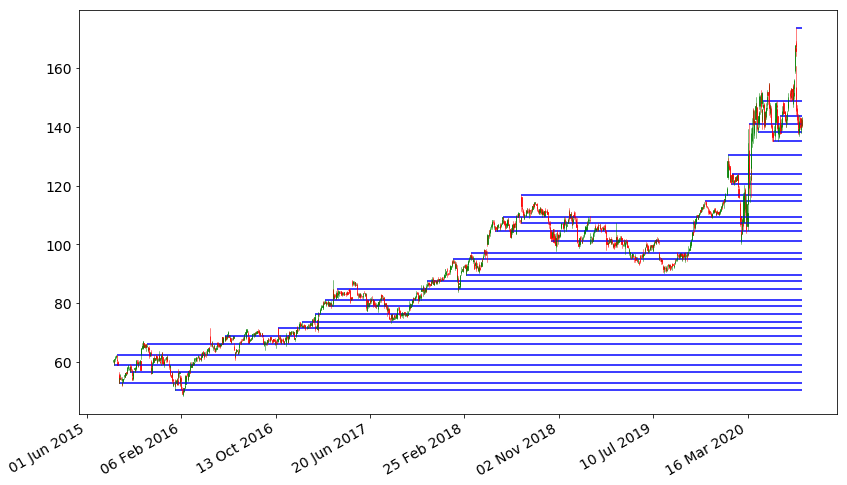

In [56]:
fig, ax = plt.subplots()

candlestick_ohlc(ax,df.values,width=0.6, \
               colorup='green', colordown='red', alpha=0.8)

date_format = mpl_dates.DateFormatter('%d %b %Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

for level in levels:
    plt.hlines(level[1],xmin=df['date'][level[0]],\
               xmax=max(df['date']),colors='blue')

fig.show()